In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, naive_bayes, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

# Libraries for text processing
import re, nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk import word_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Data

In [3]:
#Data: https://drive.google.com/file/d/1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV/view?usp=sharing
id = "1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV"
path = "https://docs.google.com/uc?export=download&id=" + id
print(path)

https://docs.google.com/uc?export=download&id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV


In [4]:
!wget "https://docs.google.com/uc?export=download&id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV" -O spam_clean.csv

--2025-02-16 12:50:23--  https://docs.google.com/uc?export=download&id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV
Resolving docs.google.com (docs.google.com)... 74.125.26.101, 74.125.26.139, 74.125.26.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.26.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV&export=download [following]
--2025-02-16 12:50:23--  https://drive.usercontent.google.com/download?id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.215.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 483640 (472K) [application/octet-stream]
Saving to: ‘spam_clean.csv’

spam_clean.csv      100%[===================>] 472.30K  --.-KB/s    in 0

In [5]:
df = pd.read_csv('./spam_clean.csv', encoding='latin-1')
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

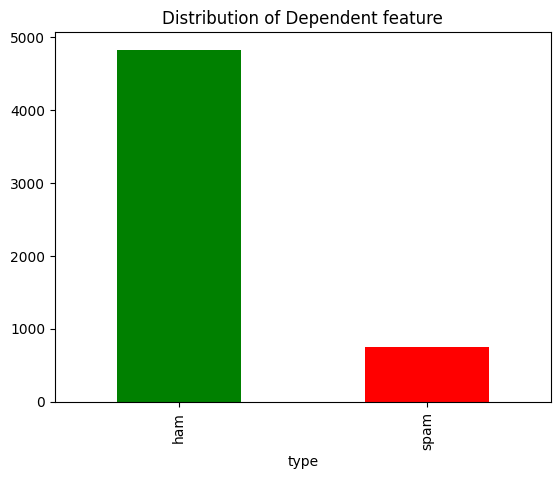

In [7]:
freq = pd.value_counts(df["type"], sort= True)
freq.plot(kind= 'bar', color= ["green", "red"])
plt.title('Distribution of Dependent feature')
plt.show()

In [8]:
# Highly Imbalance 1:5 approximately
freq

,count
type,
ham,4825
spam,747


## Text Cleaning & Preprocessing

In [9]:
def clean_tokenized_sentence(s):
    """Performs basic cleaning of a tokenized sentence"""
    cleaned_s = ""  # Create empty string to store processed sentence.
    words = nltk.word_tokenize(s)
    for word in words:
        # Convert to lowercase
        c_word = word.lower()
        # Remove punctuations
        c_word = re.sub(r'[^\w\s]', '', c_word)
        # Remove stopwords #
        if c_word != '' and c_word not in stopwords.words('english'):
            cleaned_s = cleaned_s + " " + c_word    # Append processed words to new list.
    return(cleaned_s.strip())

In [ ]:
# pd.set_option('display.max_colwidth', None)
df["cleaned_message"] = df["message"].apply(clean_tokenized_sentence)
df.head(10)

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile 11 months u r entitled update latest co...


## Most common words in Spam and Ham

In [ ]:
ham_words_freq = Counter(" ".join(df[df['type']=='ham']["cleaned_message"]).split())

Counter({'go': 248,
         'jurong': 1,
         'point': 13,
         'crazy': 10,
         'available': 14,
         'bugis': 7,
         'n': 139,
         'great': 103,
         'world': 37,
         'la': 7,
         'e': 78,
         'buffet': 2,
         'cine': 7,
         'got': 244,
         'amore': 1,
         'wat': 106,
         'ok': 279,
         'lar': 38,
         'joking': 6,
         'wif': 27,
         'u': 1004,
         'oni': 4,
         'dun': 55,
         'say': 91,
         'early': 33,
         'hor': 2,
         'c': 60,
         'already': 90,
         'nah': 10,
         'nt': 360,
         'think': 128,
         'goes': 26,
         'usf': 11,
         'lives': 4,
         'around': 59,
         'though': 26,
         'even': 56,
         'brother': 18,
         'like': 231,
         'speak': 23,
         'treat': 16,
         'aids': 1,
         'patent': 1,
         'per': 12,
         'request': 7,
         'melle': 6,
         'oru': 4,
         'm

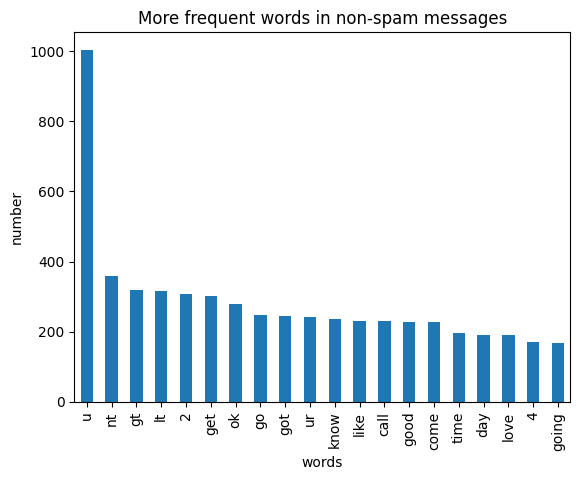

In [ ]:
counter_ham = Counter(" ".join(df[df['type']=='ham']["cleaned_message"]).split()).most_common(20)
df_ham = pd.DataFrame.from_dict(counter_ham)
df_ham = df_ham.rename(columns={0:"words in non-spam", 1:"count"})

df_ham.plot.bar(legend = False)
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

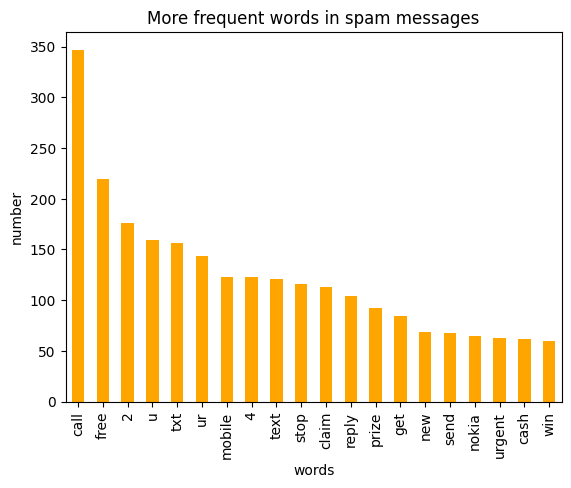

In [ ]:
counter_spam = Counter(" ".join(df[df['type']=='spam']["cleaned_message"]).split()).most_common(20)
df_spam = pd.DataFrame.from_dict(counter_spam)
df_spam = df_spam.rename(columns={0:"words in spam", 1:"count_"})

df_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

## Generate Datasets

In [ ]:
df["type"] = df["type"].map({'spam':1,'ham':0})

In [ ]:
df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

[(4179,), (1393,)]


In [ ]:
#Count Vectorizer
f = feature_extraction.text.CountVectorizer()

X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

In [ ]:
# Standard Scaler
scaler = StandardScaler(with_mean=False) # Problems with dense matrix
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test) #np.asarray(X_test.todense())

In [ ]:
print([np.shape(X_train), np.shape(X_test)])

[(4179, 7615), (1393, 7615)]


In [ ]:
type(X_train)

scipy.sparse._csr.csr_matrix

## Linear SVM Models

In [ ]:
# SVC
params = {
        'C': [1e-4,  0.001, 0.01, 0.1, 1,10],
        'class_weight' : [{ 0:0.1, 1:0.4 }, { 0:0.1, 1:0.5 }, { 0:0.1, 1:0.6 }]
        }
svc = SVC(kernel='linear')
clf = GridSearchCV(svc, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [{0: 0.1, 1: 0.4}, {0: 0.1, 1: 0.5},
                                          {0: 0.1, 1: 0.6}]},
             scoring='f1')

In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'C': 0.0001, 'class_weight': {0: 0.1, 1: 0.4}} Mean_score: 0.5289929090779552 Rank: 18
Parameters:{'C': 0.0001, 'class_weight': {0: 0.1, 1: 0.5}} Mean_score: 0.6497817092458725 Rank: 17
Parameters:{'C': 0.0001, 'class_weight': {0: 0.1, 1: 0.6}} Mean_score: 0.7050374449275063 Rank: 16
Parameters:{'C': 0.001, 'class_weight': {0: 0.1, 1: 0.4}} Mean_score: 0.7772186836518046 Rank: 6
Parameters:{'C': 0.001, 'class_weight': {0: 0.1, 1: 0.5}} Mean_score: 0.7839609357761171 Rank: 1
Parameters:{'C': 0.001, 'class_weight': {0: 0.1, 1: 0.6}} Mean_score: 0.7830624541150857 Rank: 2
Parameters:{'C': 0.01, 'class_weight': {0: 0.1, 1: 0.4}} Mean_score: 0.7788439544939494 Rank: 3
Parameters:{'C': 0.01, 'class_weight': {0: 0.1, 1: 0.5}} Mean_score: 0.7788439544939494 Rank: 3
Parameters:{'C': 0.01, 'class_weight': {0: 0.1, 1: 0.6}} Mean_score: 0.7788439544939494 Rank: 3
Parameters:{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.4}} Mean_score: 0.7692010027948709 Rank: 7
Parameters:{'C': 0.1, 'class_

## RBF SVM


In [ ]:
# RBF-SVC
params = {
        'C': [0.1, 1,10],
        'gamma':[1e-3, 0.01, 0.1, 1],
        'class_weight' : [{ 0:0.1, 1:0.4 }, { 0:0.1, 1:0.5 }, { 0:0.1, 1:0.6 }]
        }
svc = SVC(kernel='rbf')
clf = GridSearchCV(svc, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

# Intution : Euclidean distance in high dimensions in RBF calculation.

Parameters:{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.4}, 'gamma': 0.001} Mean_score: 0.0 Rank: 23
Parameters:{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.4}, 'gamma': 0.01} Mean_score: 0.0 Rank: 23
Parameters:{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.4}, 'gamma': 0.1} Mean_score: 0.0 Rank: 23
Parameters:{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.4}, 'gamma': 1} Mean_score: 0.0 Rank: 23
Parameters:{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.5}, 'gamma': 0.001} Mean_score: 0.0 Rank: 23
Parameters:{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.5}, 'gamma': 0.01} Mean_score: 0.0 Rank: 23
Parameters:{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.5}, 'gamma': 0.1} Mean_score: 0.0 Rank: 23
Parameters:{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.5}, 'gamma': 1} Mean_score: 0.0 Rank: 23
Parameters:{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.6}, 'gamma': 0.001} Mean_score: 0.2859589846842245 Rank: 3
Parameters:{'C': 0.1, 'class_weight': {0: 0.1, 1: 0.6}, 'gamma': 0.01} Mean_score: 0.0 Rank: 23
Parameters:{'C': 0.1, 'class_we

## Multinomial NB

In [ ]:
df_X_test

,cleaned_message
3245,funny fact nobody teaches volcanoes 2 erupt ts...
944,sent scores sophas secondary application schoo...
1044,know someone know fancies call 09058097218 fin...
2484,promise getting soon text morning let know mad...
812,congratulations ur awarded either å500 cd gift...
...,...
668,good evening ttyl
218,take exam march 3
5536,aiyah ok wat long got improve already wat
1657,one good partnership going take lead


In [ ]:
df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

#Count Vectorizer
f = feature_extraction.text.CountVectorizer()

X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

# No need of scaling

# Multinomial NB

params = {
        'alpha':[0.01, 0.1, 0.8, 1, 1.2, 10]
        }
mnb = naive_bayes.MultinomialNB()
clf = GridSearchCV(mnb, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")



[(4179,), (1393,)]
Parameters:{'alpha': 0.01} Mean_score: 0.8937240112174837 Rank: 4
Parameters:{'alpha': 0.1} Mean_score: 0.8896934746467166 Rank: 5
Parameters:{'alpha': 0.8} Mean_score: 0.8985897268512103 Rank: 3
Parameters:{'alpha': 1} Mean_score: 0.9022297472053865 Rank: 2
Parameters:{'alpha': 1.2} Mean_score: 0.9106711554982431 Rank: 1
Parameters:{'alpha': 10} Mean_score: 0.8603433402346446 Rank: 6


In [ ]:
mnb = naive_bayes.MultinomialNB(alpha = 1.2)
mnb.fit(X_train,y_train)


In [ ]:
y_pred = mnb.predict(X_test)
metrics.f1_score(y_test,y_pred)

0.9184782608695652

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_X_test.iloc[2]

'know someone know fancies call 09058097218 find pobox 6 ls15hb 150p'

In [ ]:
from sklearn.metrics import confusion_matrix as cm

In [ ]:
cm(y_test, y_pred)

array([[1194,    8],
       [  22,  169]])

In [ ]:
# Best classifier we are getting is from NB

In [ ]:
msg = "you are lucky winner of you got a car worth rs 50000"

In [ ]:
msg_cleaned = clean_tokenized_sentence(msg)

In [ ]:
msg_cleaned

'lucky winner got car worth rs 50000'

In [ ]:
vector = f.transform([msg_cleaned])

In [ ]:
mnb.predict(vector)

array([0])

In [ ]:
import joblib

# Save the trained model
joblib.dump(mnb, 'mnb_model.pkl')

# Save the CountVectorizer object
joblib.dump(f, 'count_vectorizer.pkl')


['count_vectorizer.pkl']

In [ ]:
from google.colab import files

# Download the model
files.download('mnb_model.pkl')

# Download the CountVectorizer
files.download('count_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## For Deployement Purpose

In [ ]:
import joblib

# Load the model
clf_loaded = joblib.load('mnb_model.pkl')

# Load the CountVectorizer
f_loaded = joblib.load('count_vectorizer.pkl')

# Use the loaded objects
X_new = f_loaded.transform(["This is a test message"])
prediction = clf_loaded.predict(X_new)
print(prediction)


In [ ]:
!pip freeze > "requirements.txt"

In [ ]:
!ls

count_vectorizer.pkl  mnb_model.pkl  requirements.txt  sample_data  spam_clean.csv


In [ ]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>